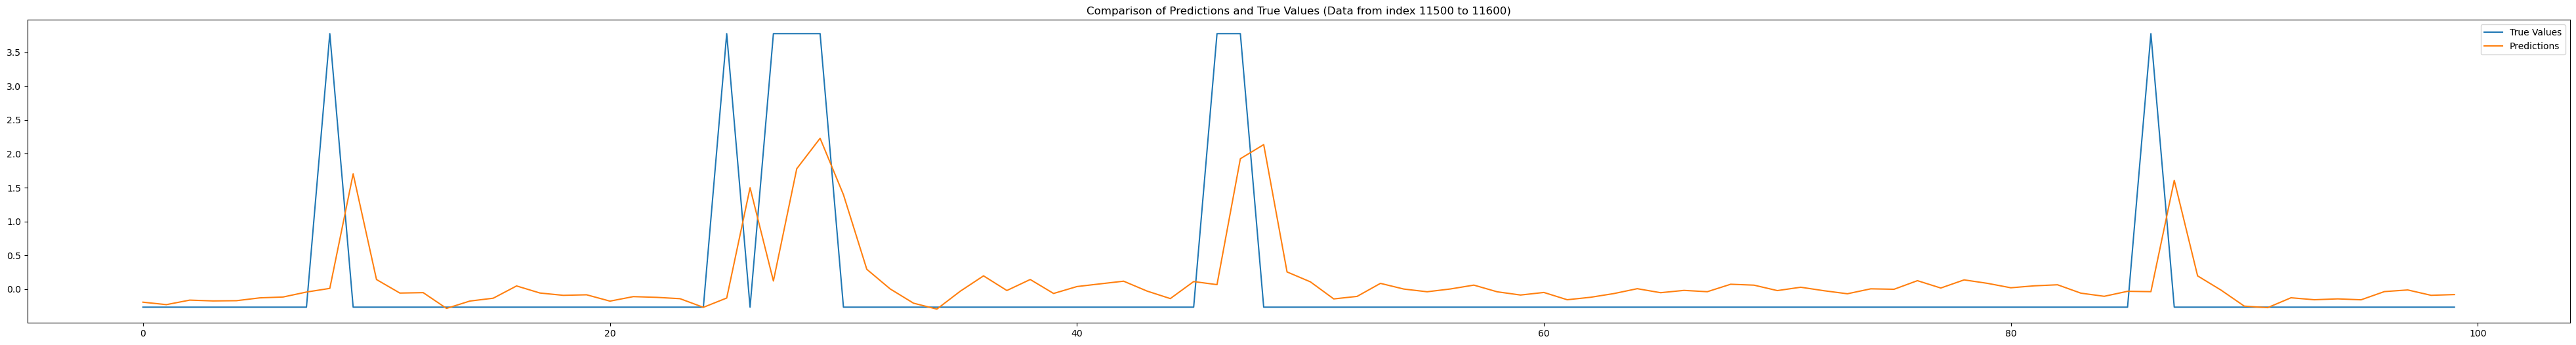

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 folder_path 是包含文件的目录
folder_path = './'

# 加载文件
metrics = np.load(f'{folder_path}metrics.npy')
predictions = np.load(f'{folder_path}pred.npy')
true_values = np.load(f'{folder_path}true.npy')
# 指定样本索引
sample_index = 11500  # 更改这个索引来查看不同的样本

# 将三维数组降维到一维
pred_1d = predictions.reshape(-1)
true_1d = true_values.reshape(-1)

# 选择绘制的数据量
num_points_to_plot = 100 # 例如，绘制前500个点

# 确保sample_index加上num_points_to_plot不会超过数组的长度
end_index = min(sample_index + num_points_to_plot, len(pred_1d))

plt.figure(figsize=(50, 6)) # 设置图形大小
plt.plot(true_1d[sample_index:end_index], label='True Values')
plt.plot(pred_1d[sample_index:end_index], label='Predictions')
plt.title(f'Comparison of Predictions and True Values (Data from index {sample_index} to {end_index})')
plt.legend()
plt.show()

MAE: 0.30904844403266907, MSE: 0.6903046369552612, RMSE: 0.8308457136154175, MAPE: 0.5779876112937927, MSPE: 2.4835286140441895


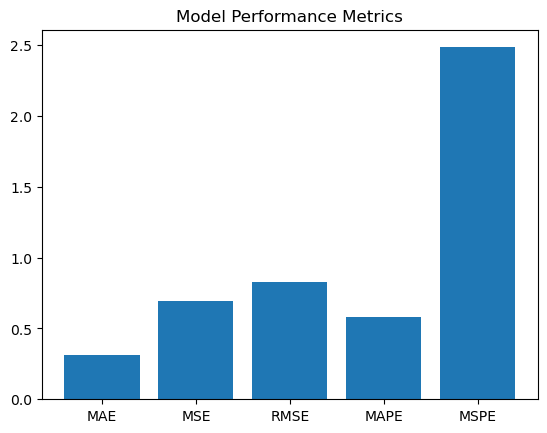

In [3]:
# 打印性能指标
print(f"MAE: {metrics[0]}, MSE: {metrics[1]}, RMSE: {metrics[2]}, MAPE: {metrics[3]}, MSPE: {metrics[4]}")

# 可视化性能指标（如果需要）
plt.bar(['MAE', 'MSE', 'RMSE', 'MAPE', 'MSPE'], metrics)
plt.title('Model Performance Metrics')
plt.show()
